In [65]:
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
import pandas as pd
from bunkatopics import BunkaTopics


In [253]:
data = pd.read_csv('dataset.csv')

/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning:

snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.

/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/file_download.py:588: FutureWarning:

`cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`



In [ ]:
import warnings


In [259]:

# Instantiate the model, extract ther terms and Embed the documents

model = BunkaTopics(data, # dataFrame
                    text_var = 'clean_text', # Text Columns
                    index_var = 'comment_id',  # Index Column (Mandatory)
                    extract_terms=True, # extract Terms ?
                    terms_embeddings=True, # extract terms Embeddings?
                    docs_embeddings=True, # extract Docs Embeddings?
                    embeddings_model="distiluse-base-multilingual-cased-v1", # Chose an embeddings Model
                    multiprocessing=True, # Multiprocessing of Embeddings
                    language="fr", # Chose between English "en" and French "fr"
                    sample_size_terms = len(data),
                    terms_limit=10000, # Top Terms to Output
                    terms_ents=True, # Extract entities
                    terms_ngrams=(1, 2), # Chose Ngrams to extract
                    terms_ncs=True, # Extract Noun Chunks
                    terms_include_pos=["NOUN", "PROPN", "ADJ"], # Include Part-of-Speech
                    terms_include_types=["PERSON", "ORG"],
                    reduction = 2) # Include Entity Types


2022-12-15 13:05:18,870 - Extracting Terms...
100%|██████████████████████████████████████| 5448/5448 [00:27<00:00, 197.75it/s]
2022-12-15 13:05:46,882 - Extracting Docs Embeddings...
100%|███████████████████████████████████████| 5448/5448 [01:35<00:00, 57.34it/s]
/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(
/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(
/Users/charle

UMAP(random_state=42, verbose=True)
Thu Dec 15 13:07:23 2022 Construct fuzzy simplicial set
Thu Dec 15 13:07:23 2022 Finding Nearest Neighbors
Thu Dec 15 13:07:23 2022 Building RP forest with 9 trees


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Thu Dec 15 13:07:25 2022 NN descent for 12 iterations
	 1  /  12
	 2  /  12
	 3  /  12
	 4  /  12
	 5  /  12
	 6  /  12
	Stopping threshold met -- exiting after 6 iterations
Thu Dec 15 13:07:31 2022 Finished Nearest Neighbor Search
Thu Dec 15 13:07:32 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

2022-12-15 13:07:38,027 - Extracting Terms Embeddings...


Thu Dec 15 13:07:37 2022 Finished embedding


100%|████████████████████████████████████| 10000/10000 [01:25<00:00, 116.87it/s]
/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  warnings.warn(
/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/file_download.py:588: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  warnings.warn(
/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/huggingface_hub/snapshot_download.py:6: FutureWarning: snapshot_download.py has been made private and 

UMAP(random_state=42, verbose=True)
Thu Dec 15 13:09:05 2022 Construct fuzzy simplicial set
Thu Dec 15 13:09:05 2022 Finding Nearest Neighbors
Thu Dec 15 13:09:05 2022 Building RP forest with 10 trees
Thu Dec 15 13:09:05 2022 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	 5  /  13
	 6  /  13
	Stopping threshold met -- exiting after 6 iterations
Thu Dec 15 13:09:05 2022 Finished Nearest Neighbor Search
Thu Dec 15 13:09:05 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Thu Dec 15 13:09:14 2022 Finished embedding


In [260]:
# get_cluster using Kmeans on the already existing 2 Dimensions

In [544]:
import pickle

# Save the model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [545]:
import pickle

# Load the model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

In [511]:
from sklearn.cluster import KMeans
from bunkatopics.specificity import specificity

In [540]:



def get_clusters(topic_number = 20,
                top_terms = 4,
                term_type = "lemma",
                top_terms_included = 1000,
                out_terms = ['juif'],
                ngrams = (1,2)):
    

    data_clusters = model.data.copy()
    df_index_extented = model.df_terms_indexed.reset_index().copy()
    terms = model.terms[model.terms["ngrams"].isin(ngrams)]
    
    if out_terms is not None:
        terms = terms[~terms[term_type].isin(out_terms)]

    kmeans = KMeans(n_clusters=topic_number, random_state=42)
    data_clusters['cluster'] = kmeans.fit(model.docs_embeddings.values).labels_


    df_index_extented = df_index_extented.explode("text").reset_index(drop=True)

    df_index_extented = pd.merge(df_index_extented,
        terms
        .reset_index()
        .head(top_terms_included),
        on="text",
    )
    df_index_extented = df_index_extented.set_index(model.index_var)

    # Get the Topics Names
    df_clusters = pd.merge(
        data_clusters[["cluster"]],
        df_index_extented,
        left_index=True,
        right_index=True,
    )


    _, _, edge = specificity(
        df_clusters, X="cluster", Y=term_type, Z=None, top_n=top_terms
    )


    topics = (
        edge.groupby("cluster")[term_type]
        .apply(lambda x: " | ".join(x))
        .reset_index()
    )
    topics = topics.rename(columns={term_type: "cluster_name"})


    # Get the Topics Size
    topic_size = (
        data_clusters[["cluster"]]
        .reset_index()
        .groupby("cluster")[model.index_var]
        .count()
        .reset_index()
    )


    topic_size.columns = ["cluster", "topic_size"]
    topics = pd.merge(topics, topic_size, on="cluster")
    topics = topics.sort_values("topic_size", ascending=False).reset_index(drop=True)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns = [0, 1])
    centroids['cluster'] = centroids.index

    topics = pd.merge(topics, centroids, on = 'cluster')

    data_clusters = data_clusters[['cluster']]
    data_clusters = pd.merge(data_clusters, model.docs_embeddings, left_index = True, right_index = True)
    data_clusters = pd.merge(data_clusters, topics[['cluster', 'cluster_name']], on = 'cluster')
    
    
    data_clusters.index = model.data.index
    

    return topics, data_clusters

In [556]:
new_topics = topics.copy()
new_topics["percent"] = round(
    new_topics["topic_size"] / new_topics["topic_size"].sum() * 100, 0
)
new_topics["text"] = new_topics["cluster_name"].apply(lambda x: x.split(" | "))
new_topics = new_topics.explode("text")


df_indexed = model.df_terms_indexed.copy().reset_index()
df_indexed = df_indexed.explode("text")

In [559]:
data_clusters[["cluster"]].reset_index()

,comment_id,cluster
0,Ugw-DHn29-jVf8VKl0J4AaABAg,1
1,Ugw-EG1JNwEcOgu08ft4AaABAg.9PZ4fwqJhU79RvcvXgjnTk,1
2,Ugw-GMPBDF2-r1Bl5LJ4AaABAg,1
3,Ugw-I51BnMIp1QJfQyt4AaABAg,1
4,Ugw-K7j1WisD-M29p-l4AaABAg,1
...,...,...
5443,UgzzZtmsGbo_TQsM0lp4AaABAg,4
5444,UgzzeKDoFCvdeTHE63B4AaABAg,4
5445,UgzzkuJ3i7ViehjFqBN4AaABAg.9J_yFXTJ2of9JerLHZA9lU,4
5446,UgzzxfM1j_1tNSWQYVF4AaABAg,4


In [569]:
topics['percent'] = round(topics['topic_size']/topics['topic_size'].sum()*100,1)

In [570]:
topics

,cluster,cluster_name,topic_size,0,1,percent
0,2,juif | musulman | chrétien | zemmour,1893,0.058960,0.283059,34.7
1,0,palestinien | israël | hypocrite | terroriste,1882,-2.288302,-1.549559,34.5
2,1,sataniste | macron | soro | vaccin,1591,3.925045,1.024893,29.2
3,4,loge occulte | occulte | loge | membre,44,14.240567,-2.836672,0.8
4,3,"mouton | biiiiien | illuminés"" | niveau mondial",38,3.154738,11.550298,0.7


In [561]:
model.index_var

'comment_id'

In [ ]:

  
    df_indexed = pd.merge(
        df_indexed,
        model.data_clusters[["cluster"]].reset_index(),
        on=model.index_var,
    )


In [550]:
topics, data_clusters = get_clusters(topic_number = 5,
                top_terms = 4,
                out_terms = None,
                term_type = "lemma",
                top_terms_included = 1000,
                ngrams = (1,2))

In [551]:
data_clusters

,cluster,0,1,cluster_name
comment_id,,,,
Ugw-DHn29-jVf8VKl0J4AaABAg,1,3.343016,3.586405,sataniste | macron | soro | vaccin
Ugw-EG1JNwEcOgu08ft4AaABAg.9PZ4fwqJhU79RvcvXgjnTk,1,3.137868,1.178267,sataniste | macron | soro | vaccin
Ugw-GMPBDF2-r1Bl5LJ4AaABAg,1,3.198549,2.784761,sataniste | macron | soro | vaccin
Ugw-I51BnMIp1QJfQyt4AaABAg,1,4.725460,0.930349,sataniste | macron | soro | vaccin
Ugw-K7j1WisD-M29p-l4AaABAg,1,7.096238,0.402615,sataniste | macron | soro | vaccin
...,...,...,...,...
UgzzZtmsGbo_TQsM0lp4AaABAg,4,15.342798,-4.100214,loge occulte | occulte | loge | membre
UgzzeKDoFCvdeTHE63B4AaABAg,4,14.863843,-3.871482,loge occulte | occulte | loge | membre
UgzzkuJ3i7ViehjFqBN4AaABAg.9J_yFXTJ2of9JerLHZA9lU,4,14.572749,-3.725858,loge occulte | occulte | loge | membre


In [542]:
import plotly.graph_objs as go
import numpy as np

def wrap_by_word(string, n_words):
    """returns a string where \\n is inserted between every n words"""
    try:
        a = string.split()
        ret = ""
        for i in range(0, len(a), n_words):
            ret += " ".join(a[i : i + n_words]) + "<br>"
    except:
        pass

    return ret

def get_density_plot(
    x,
    y,
    texts,
    clusters,
    x_centroids,
    y_centroids,
    label_centroids,
    width,
    height,
    sizes=None,
    colors=None,
):

    fig_density = go.Figure(
        go.Histogram2dContour(x=x, y=y, colorscale="delta", showscale=False)
    )

    # colorbar=None,

    fig_density.update_traces(contours_coloring="fill", contours_showlabels=False)

    fig_density.update_layout(
        font_size=25,
        width=width,
        height=height,
        margin=dict(
            t=width / 50,
            b=width / 50,
            r=width / 50,
            l=width / 50,
        ),
        title=dict(font=dict(size=width / 40)),
    )
    
    texts = [wrap_by_word(x, 10) for x in texts]

    nk = np.empty(shape=(len(texts), 3, 1), dtype="object")
    nk[:, 0] = np.array(clusters).reshape(-1, 1)
    nk[:, 1] = np.array(texts).reshape(-1, 1)
    nk[:, 2] = np.array(sizes).reshape(-1, 1)

    # Add points with information
    fig_density.add_trace(
        go.Scatter(
            x=x,
            y=y,
            mode="markers",
            marker=dict(size=sizes, color=colors),
            # marker=dict(color="#000000"),
            customdata=nk,
            hovertemplate="<br><b>TOPIC</b>: %{customdata[0]}<br>"
            + "<br><b>TEXT</b>: %{customdata[1]}<br>"
            + "<br><b>SCORE</b>: %{customdata[2]}<br>",
        )
    )

    # Add centroids labels
    for x, y, label in zip(x_centroids, y_centroids, label_centroids):
        fig_density.add_annotation(
            x=x,
            y=y,
            text=label,
            showarrow=True,
            arrowhead=1,
            font=dict(
                family="Courier New, monospace", size=width / 100, color="#ffffff"
            ),
            bordercolor="#c7c7c7",
            borderwidth=width / 1000,
            borderpad=width / 500,
            bgcolor="#ff7f0e",
            opacity=1,
            arrowcolor="#ff7f0e",
        )

    fig_density.update_layout(showlegend=False)
    fig_density.update_xaxes(showgrid=False, showticklabels=False, zeroline=False)
    fig_density.update_yaxes(showgrid=False, showticklabels=False, zeroline=False)
    fig_density.update_yaxes(showticklabels=False)
    fig_density.update_layout(coloraxis_showscale=False)

    return fig_density


In [543]:

fig = get_density_plot(
    x = list(data_clusters[0]),
    y = list(data_clusters[1]),
    texts = list(data['text']),
    clusters = list(data_clusters['cluster_name']),
    x_centroids = list(topics[0]),
    y_centroids = list(topics[1]),
    label_centroids = list(topics['cluster_name']) ,
    width = 2000,
    height = 2000,
    sizes=None,
    colors= None,
)

import plotly
plotly.offline.plot(fig, filename='file.html')

'file.html'

In [387]:
df_indexed = model.df_terms_indexed.copy().reset_index()
df_indexed = df_indexed.explode("text")

In [428]:
def get_specific_documents_per_cluster(
        model, top_n=10, top_type="terms_based", pop_var="Times Cited, WoS Core"
    ):
        """Extract the top documents per clusters based on two rules: (top_type: terms_based)
        - either the documents with the msot specific terms in it: (top_type: pop_based)
        - the most popular documents
        """

        if top_type == "terms_based":

            new_topics = topics.copy()
            new_topics["percent"] = round(
                new_topics["topic_size"] / new_topics["topic_size"].sum() * 100, 0
            )
            new_topics["text"] = new_topics["cluster_name"].apply(
                lambda x: x.split(" | ")
            )
            new_topics = new_topics.explode("text")

            df_indexed = model.df_terms_indexed.copy().reset_index()
            df_indexed = df_indexed.explode("text")
            df_indexed = pd.merge(
                df_indexed, data_clusters[["cluster"]].reset_index()
            )

            top_doc = pd.merge(df_indexed, new_topics, on=["text", "cluster"])
            top_doc = (
                top_doc.groupby([model.index_var, "cluster"])["text"]
                .count()
                .reset_index()
            )

            top_doc = top_doc.sort_values(["cluster", "text"], ascending=(False, False))
            top_doc = top_doc.groupby("cluster").head(top_n).reset_index(drop=True)
            top_doc = pd.merge(topics, top_doc, on="cluster")
            top_doc = top_doc.rename(columns = {'text':'count_terms'})

        elif top_type == "pop_based":

            df_popularity = data_clusters[[pop_var] + ["cluster"]]
            df_popularity = df_popularity.sort_values(
                ["cluster"] + [pop_var], ascending=(False, False)
            )
            df_popularity = df_popularity.groupby("cluster").head(top_n).reset_index()
            df_popularity = pd.merge(df_popularity, model.topics, on="cluster")
            top_doc = df_popularity.copy()

        return top_doc


In [547]:
model.df_terms_indexed.copy().reset_index()

,comment_id,text
0,Ugw-DHn29-jVf8VKl0J4AaABAg,"[israël, plein, honte, imbéciles, humanité, fr..."
1,Ugw-EG1JNwEcOgu08ft4AaABAg.9PZ4fwqJhU79RvcvXgjnTk,"[piège, parmentier, dictionnaire, bon, islam, ..."
2,Ugw-GMPBDF2-r1Bl5LJ4AaABAg,"[putain, france, putain encore des juifs qu'il..."
3,Ugw-I51BnMIp1QJfQyt4AaABAg,"[moustache, sénateur, étanche, clown]"
4,Ugw-K7j1WisD-M29p-l4AaABAg,"[respect monsieur, sos, civilisation, épreuve,..."
...,...,...
5441,UgzzZtmsGbo_TQsM0lp4AaABAg,"[idiots, parfaits, arabes, etats-unis, parfait..."
5442,UgzzeKDoFCvdeTHE63B4AaABAg,"[marche, france, maçon, guerre civile, franc, ..."
5443,UgzzkuJ3i7ViehjFqBN4AaABAg.9J_yFXTJ2of9JerLHZA9lU,"[pattes, croisés et les chrétiens, saches, pay..."
5444,UgzzxfM1j_1tNSWQYVF4AaABAg,"[, merci rothschild, incompétent, minable, min..."


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(go.Scatter(x = list(data_clusters[0]), 
                            y =  list(data_clusters[1]),
                            mode="markers",
                            marker=dict(color= list(data_clusters['cluster']))))

# Add a text label for each centroid
for i, centroid in enumerate(kmeans.cluster_centers_):

    fig.add_trace(go.Scatter(x=[centroid[0]], 
                             y=[centroid[1]], 
                             text=f'Centroid {i}', 
                             mode='text'))
    fig.update_layout(font_size=10,
                    width=2000,
                    height=2000)

In [438]:
top_doc = get_specific_documents_per_cluster( model, top_n=1, top_type="terms_based", pop_var="Times Cited, WoS Core")
top_doc = pd.merge(top_doc, model.data.reset_index(), on = 'comment_id')
top_doc = top_doc[['cluster_name', 'text', 'count_terms']]

In [440]:
top_doc.to_clipboard(index=False)

In [449]:
dim1 = {'negative':['hate', 'violent', 'fear']}
dim2 = {'positive':['good', 'nice']}




In [524]:
from bunkatopics.folding_utils import index_data
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn import metrics

def get_folding(model, dictionnary):
        """category	term
        0	negative	hate
        1	negative	violence
        2	negative	pain
        3	negative	negative
        4	positive	good
        """

        df_indexed = pd.DataFrame()

        for cat in set(dictionnary.category):

            dictionnary_filtered = dictionnary[dictionnary["category"] == cat][
                "term"
            ].to_list()

            df_indexed_filtered = index_data(
                dictionnary_filtered, model.data[model.text_var].to_list()
            )
            df_indexed_filtered.columns = [model.text_var, "term", "sent_location"]
            df_indexed_filtered = pd.merge(
                df_indexed_filtered,
                model.data[[model.text_var]].reset_index(),
                on=model.text_var,
            )

            df_indexed_filtered["label"] = cat
            df_indexed = df_indexed.append(df_indexed_filtered)

        # Merge with embeddings

        df_embeddings = model.docs_embeddings.reset_index()
        df_embeddings = df_embeddings.rename(columns={"index": model.index_var})
        df_final = pd.merge(df_embeddings, df_indexed, on=model.index_var)

        emb_columns = list(np.arange(model.reduction))

        # Train self
        data_self = df_final[emb_columns + ["label"]]
        data_self.index = df_final[model.index_var]

        df_train, df_test = train_test_split(data_self, test_size=0.3, random_state=42)

        X_train = df_train.drop("label", 1)
        X_test = df_test.drop("label", 1)

        y_train = df_train["label"].to_list()
        y_test = df_test["label"].to_list()

        classifier = OneVsRestClassifier(XGBClassifier())
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        met = metrics.classification_report(y_test, y_pred, digits=3)

        # Predict for the whiole dataset
        df_folding = pd.DataFrame(
            classifier.predict_proba(model.docs_embeddings), columns=classifier.classes_
        )
        df_folding["label"] = classifier.predict(model.docs_embeddings)
        df_folding.index = model.docs_embeddings.index

        df_folding = pd.merge(
            df_folding, model.data[[model.text_var]], left_index=True, right_index=True
        )
        df_folding = pd.merge(
            df_folding, model.docs_embeddings, left_index=True, right_index=True
        )

        return df_folding, met


In [490]:
# Create dictionaries
dim1 = {'israel':['israel']}
dim2 = {'complot':['complot']}


dictionnary = pd.DataFrame()

for x in [dim1, dim2]:
    dictionnary = dictionnary.append(pd.DataFrame(x).unstack().reset_index())
    
dictionnary = dictionnary.drop('level_1', 1).reset_index(drop=True)
dictionnary.columns =['category', 'term']


df_folding, met = get_folding(model, dictionnary)

  0%|          | 0/5448 [00:00<?, ?it/s]

  0%|          | 0/5448 [00:00<?, ?it/s]

In [507]:
df_folding.clean_text.iloc[2]

"putain encore des juifs qu'ils viennent nous dire quoi penser en france!!"

In [502]:
test = pd.merge(df_folding, data_clusters, left_index = True, right_index = True)
test = test[[list(dim1.keys())[0], list(dim2.keys())[0], 'cluster']]

In [240]:
# remake the clustering

In [241]:

    
for i, centroid in enumerate(kmeans.cluster_centers_):
        print(i)

0
1
2
3
4
5
6
7
8
9


In [248]:
centroids_emb = pd.DataFrame(model.kmeans.cluster_centers_, columns = ['dim_1', 'dim_2'])
centroids_emb['cluster'] = centroids_emb.index

In [251]:
len_dim= np.arange(5)
len_dim

array([0, 1, 2, 3, 4])

In [ ]:
centroid = bunka_model.df_topics_names.copy()
centroid = centroid.drop('cluster', 1)

centroid['cluster'] = centroid['cluster_name_number'].apply(lambda x : x.split(' - ')[0])
centroid = centroid[['cluster_name_number', 'cluster']].drop_duplicates().reset_index(drop=True)


In [237]:
import plotly.express as px
from sklearn.cluster import KMeans

def plot_clusters(dataframe):
    
    kmeans = KMeans(n_clusters=30)
    kmeans.fit(dataframe)

    # Create a new dataframe with the cluster labels and the x and y columns
    clustered_data = dataframe.copy()
    clustered_data['cluster'] = kmeans.labels_

    # Create a scatter plot with the clusters and the centroids
    #fig = px.scatter(clustered_data, x='0', y='1', color='cluster')
    
    fig = go.Figure(go.Scatter(x = list(clustered_data['0']), 
                              y =  list(clustered_data['1']),
                                 mode="markers",
                            marker=dict(color= list(clustered_data['cluster']))),

                   )

    # Add a text label for each centroid
    for i, centroid in enumerate(kmeans.cluster_centers_):
        
        fig.add_trace(go.Scatter(x=[centroid[0]], 
                                 y=[centroid[1]], 
                                 text=f'Centroid {i}', 
                                 mode='text'))
        fig.update_layout(font_size=10,
                        width=2000,
                        height=2000)
    return fig

In [238]:
fig = plot_clusters(data)

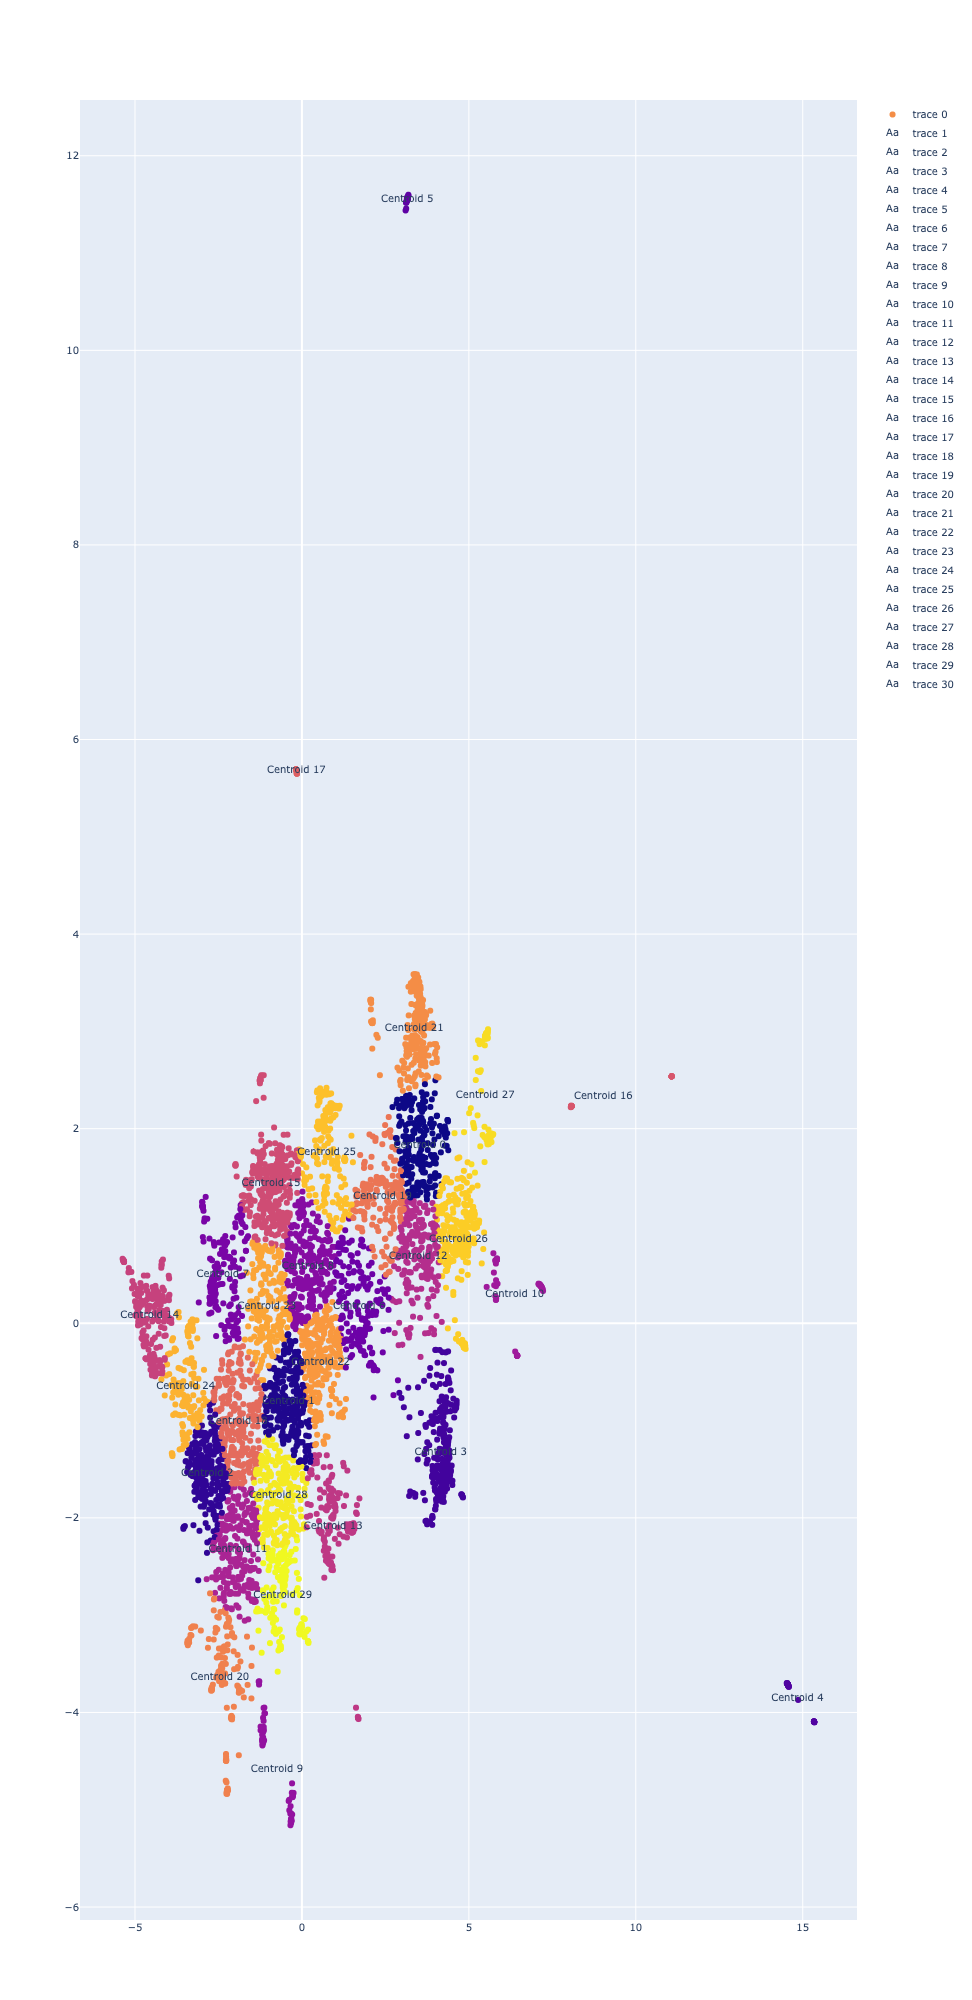

In [239]:
fig.show()

In [186]:

kmeans = KMeans(n_clusters=10)

clusters = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_

In [ ]:
 (n_clusters, n_features)

In [193]:
kmeans.labels_

array([1, 2, 2, ..., 0, 1, 3], dtype=int32)

In [191]:
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=10)
File:        ~/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centroids using sampling based on
    an empirical probability distribution of the points' contribution to the
    overall inertia. This technique speeds up convergence, and is
    theoretically proven to be :math:`\mathcal{O}(\log k)`-optimal.
    See the description of `n_init` for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an arr

In [171]:
import plotly.express as plot
from sklearn.cluster import KMeans

def plot_clusters(data, num_clusters):
    # compute the clusters and centroids
    
    kmeans = KMeans(n_clusters=num_clusters)

    clusters = kmeans.fit_predict(data)
    centroids = kmeans.cluster_centers_

      # create a scatter plot using plotly
    fig = plot.scatter(data, x="0", y="1", color=clusters, 
                         title="K-means Clustering with {} Clusters".format(num_clusters))

      # add the centroids as text labels
    for i, centroid in enumerate(centroids):
        fig.add_trace(
          plot.scatter(x=[centroid[0]], y=[centroid[1]], 
                       mode="text", text=[i],
                       name="Centroid {}".format(i),
                       textposition="bottom center"
                       )
        )

    return fig


In [173]:
centroids

array([[ 3.67611198,  1.16276541],
       [-1.34645016, -0.81073584]])

In [172]:
fig = plot_clusters(data, num_clusters = 10)

TypeError: scatter() got an unexpected keyword argument 'mode'

In [164]:
centroids, _ = kmeans(data, 2)

In [162]:
import plotly.express as px
from scipy.cluster.vq import kmeans, vq

def plot_points_and_centroids(df):
    # calculate centroids for each cluster
    centroids, _ = kmeans(df, 2)

    # create a scatter plot with the points and their centroids
    fig = px.scatter(df, x="0", y="1", color="label")

    # add the centroids to the scatter plot
    fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1],
                    mode="markers", marker=dict(size=10, color="black"),
                    name="centroids")

    return fig

In [163]:
test = plot_points_and_centroids(data)

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['0', '1'] but received: label

In [159]:
import plotly.express as px
from scipy.cluster.vq import centroid

def plot_points_and_centroids(df):
    # Calculate the centroids
    centroids = centroid(df)

    # Create the scatter plot
    fig = px.scatter(x=df['x'], y=df['y'])

    # Add the centroids to the scatter plot
    fig.add_scatter(x=centroids[:, 0], y=centroids[:, 1], mode='markers', marker={'color': 'red'})

    # Show the plot
    
    return fig
    #fig.show()

ImportError: cannot import name 'centroid' from 'scipy.cluster.vq' (/Users/charlesdedampierre/Desktop/BUNKA Project/BunkaTopics/.venv/lib/python3.8/site-packages/scipy/cluster/vq.py)

In [153]:
data = pd.read_csv('emb_test.csv', index_col = [0])

# Fit a k-means clustering model to your data
kmeans = KMeans(n_clusters=10)
kmeans.fit(data)

# Use the predict method to assign each data point to a cluster
cluster_assignments = kmeans.predict(data)

# Use the Counter object to count the number of points in each cluster
cluster_counts = Counter(cluster_assignments)

# Calculate the density of each cluster
num_points = len(data)
total_density = 0
cluster_densities = {}
for cluster, count in cluster_counts.items():
    density = count / num_points
    cluster_densities[cluster] = density
    total_density += density

# Calculate the weighted centroid of each cluster
centroids = {}
for cluster in range(kmeans.n_clusters):
    mask = cluster_assignments == cluster
    density = cluster_densities[cluster]
    weight = density / total_density
    centroid = np.mean(data[mask], axis=0) * weight
    centroids[cluster] = centroid
    #centroids.append(centroid)
    
df_centroids = pd.DataFrame(centroids).T.reset_index()
df_centroids = df_centroids.rename(columns = {'index':'cluster_centroid'})

In [154]:
data['cluster'] = cluster_assignments
data['cluster'] = data['cluster'].astype(str)
data['text'] = 'hi'

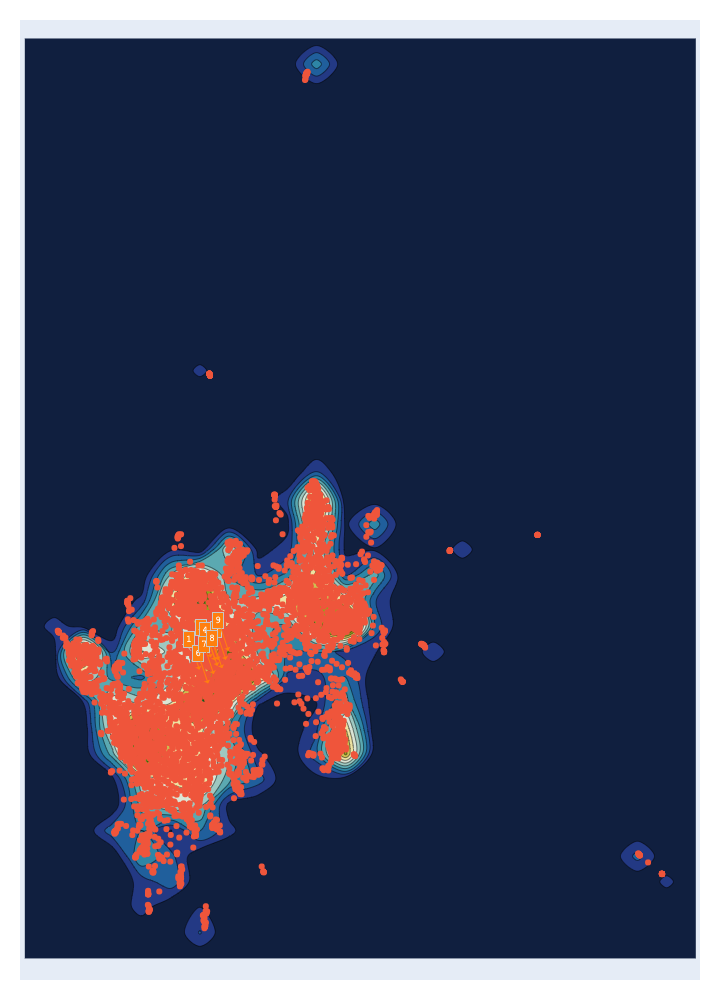

In [156]:
fig.show()

In [ ]:
fig = get_density_plot(
    x = list(data['0']),
    y = list(data['1']),
    texts = list(data['text']),
    clusters = list(data['cluster']),
    x_centroids = list(df_centroids['0']),
    y_centroids = list(df_centroids['1']),
    label_centroids = list(df_centroids['cluster_centroid']) ,
    width = 1000,
    height = 1000,
    sizes=None,
    colors= None,
)

In [109]:
# display the results